<a href="https://colab.research.google.com/github/DanielaPortilloMercado/Inteligencia-Artificial/blob/main/PARCIALES/SEGUNDOPARCIAL/Pregunta1_D1/SegundoParcial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

SEGUNDO PARCIAL (APRENDIZAJE NO SUPERVISADO)

Implementación del clustering haciendo uso del algoritmo K-Means

ESTUDIANTE: PORTILLO MERCADO DANIELA

CARRERA: Ingeniería de Sistemas

FECHA: 28/05/2025

Enlace de git:

Enlace dataset: https://www.kaggle.com/datasets/rakuraku678/mnist-60000-hand-written-number-images?resource=download


In [9]:
# Librerías necesarias
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from google.colab import drive


In [50]:
# Mount Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [51]:
# Parámetros y nombres de columnas
num_features = 784
column_names = ['label'] + [f'pixel{i}' for i in range(num_features)]

# Cargar dataset con nombres de columnas
train_data = pd.read_csv("/content/drive/MyDrive/mnist_train.csv", header=None, names=column_names)
test_data = pd.read_csv("/content/drive/MyDrive/mnist_test.csv", header=None, names=column_names)

# Mostrar un vistazo rápido
print("Primeras filas del dataset de entrenamiento:")
display(train_data.head())



Primeras filas del dataset de entrenamiento:


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,pixel40,pixel41,pixel42,pixel43,pixel44,pixel45,pixel46,pixel47,pixel48,pixel49,pixel50,pixel51,pixel52,pixel53,pixel54,pixel55,pixel56,pixel57,pixel58,pixel59,pixel60,pixel61,pixel62,pixel63,pixel64,pixel65,pixel66,pixel67,pixel68,pixel69,pixel70,pixel71,pixel72,pixel73,pixel74,pixel75,pixel76,pixel77,pixel78,pixel79,pixel80,pixel81,pixel82,pixel83,pixel84,pixel85,pixel86,pixel87,pixel88,pixel89,pixel90,pixel91,pixel92,pixel93,pixel94,pixel95,pixel96,pixel97,pixel98,pixel99,pixel100,pixel101,pixel102,pixel103,pixel104,pixel105,pixel106,pixel107,pixel108,pixel109,pixel110,pixel111,pixel112,pixel113,pixel114,pixel115,pixel116,pixel117,pixel118,pixel119,pixel120,pixel121,pixel122,pixel123,pixel124,pixel125,pixel126,pixel127,pixel128,pixel129,pixel130,pixel131,pixel132,pixel133,pixel134,pixel135,pixel136,pixel137,pixel138,pixel139,pixel140,pixel141,pixel142,pixel143,pixel144,pixel145,pixel146,pixel147,pixel148,pixel149,pixel150,pixel151,pixel152,pixel153,pixel154,pixel155,pixel156,pixel157,pixel158,pixel159,pixel160,pixel161,pixel162,pixel163,pixel164,pixel165,pixel166,pixel167,pixel168,pixel169,pixel170,pixel171,pixel172,pixel173,pixel174,pixel175,pixel176,pixel177,pixel178,pixel179,pixel180,pixel181,pixel182,pixel183,pixel184,pixel185,pixel186,pixel187,pixel188,pixel189,pixel190,pixel191,pixel192,pixel193,pixel194,pixel195,pixel196,pixel197,pixel198,pixel199,pixel200,pixel201,pixel202,pixel203,pixel204,pixel205,pixel206,pixel207,pixel208,pixel209,pixel210,pixel211,pixel212,pixel213,pixel214,pixel215,pixel216,pixel217,pixel218,pixel219,pixel220,pixel221,pixel222,pixel223,pixel224,pixel225,pixel226,pixel227,pixel228,pixel229,pixel230,pixel231,pixel232,pixel233,pixel234,pixel235,pixel236,pixel237,pixel238,pixel239,pixel240,pixel241,pixel242,pixel243,pixel244,pixel245,pixel246,pixel247,pixel248,pixel249,pixel250,pixel251,pixel252,pixel253,pixel254,pixel255,pixel256,pixel257,pixel258,pixel259,pixel260,pixel261,pixel262,pixel263,pixel264,pixel265,pixel266,pixel267,pixel268,pixel269,pixel270,pixel271,pixel272,pixel273,pixel274,pixel275,pixel276,pixel277,pixel278,pixel279,pixel280,pixel281,pixel282,pixel283,pixel284,pixel285,pixel286,pixel287,pixel288,pixel289,pixel290,pixel291,pixel292,pixel293,pixel294,pixel295,pixel296,pixel297,pixel298,pixel299,pixel300,pixel301,pixel302,pixel303,pixel304,pixel305,pixel306,pixel307,pixel308,pixel309,pixel310,pixel311,pixel312,pixel313,pixel314,pixel315,pixel316,pixel317,pixel318,pixel319,pixel320,pixel321,pixel322,pixel323,pixel324,pixel325,pixel326,pixel327,pixel328,pixel329,pixel330,pixel331,pixel332,pixel333,pixel334,pixel335,pixel336,pixel337,pixel338,pixel339,pixel340,pixel341,pixel342,pixel343,pixel344,pixel345,pixel346,pixel347,pixel348,pixel349,pixel350,pixel351,pixel352,pixel353,pixel354,pixel355,pixel356,pixel357,pixel358,pixel359,pixel360,pixel361,pixel362,pixel363,pixel364,pixel365,pixel366,pixel367,pixel368,pixel369,pixel370,pixel371,pixel372,pixel373,pixel374,pixel375,pixel376,pixel377,pixel378,pixel379,pixel380,pixel381,pixel382,pixel383,pixel384,pixel385,pixel386,pixel387,pixel388,pixel389,pixel390,pixel391,pixel392,pixel393,pixel394,pixel395,pixel396,pixel397,pixel398,pixel399,pixel400,pixel401,pixel402,pixel403,pixel404,pixel405,pixel406,pixel407,pixel408,pixel409,pixel410,pixel411,pixel412,pixel413,pixel414,pixel415,pixel416,pixel417,pixel418,pixel419,pixel420,pixel421,pixel422,pixel423,pixel424,pixel425,pixel426,pixel427,pixel428,pixel429,pixel430,pixel431,pixel432,pixel433,pixel434,pixel435,pixel436,pixel437,pixel438,pixel439,pixel440,pixel441,pixel442,pixel443,pixel444,pixel445,pixel446,pixel447,pixel448,pixel449,pixel450,pixel451,pixel452,pixel453,pixel454,pixel455

In [52]:
# Separar etiquetas y características
y_train = train_data['label']
X_train = train_data.drop('label', axis=1)

y_test = test_data['label']
X_test = test_data.drop('label', axis=1)


In [53]:
# Normalizar datos (estandarización)
scaler = StandardScaler()
scaled_train_data = scaler.fit_transform(X_train)
scaled_test_data = scaler.transform(X_test)


Primeras 20 etiquetas de clusters asignadas a los datos de entrenamiento:
[8 6 2 0 1 8 0 8 0 8 7 8 7 9 0 3 1 8 9 3]


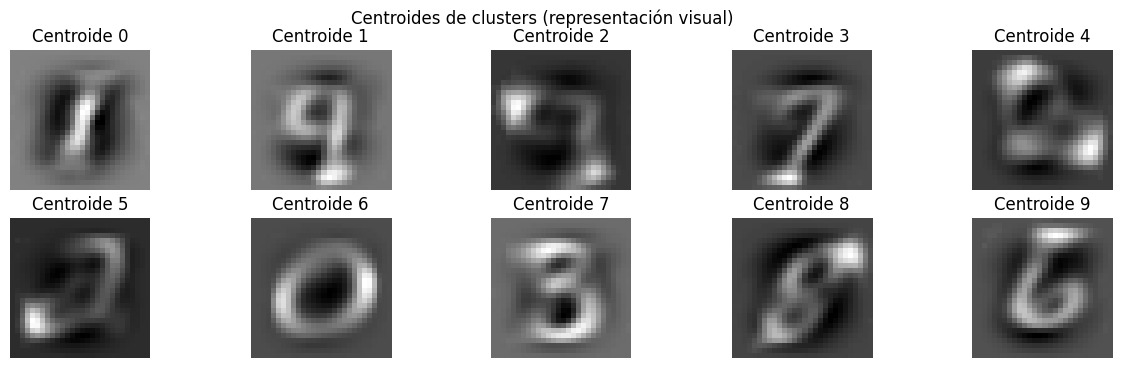

In [54]:
# --- Entrenar KMeans ---
num_clusters = 10  # 10 dígitos del 0 al 9

kmeans = KMeans(n_clusters=num_clusters, random_state=42, n_init=10)
kmeans.fit(scaled_train_data)

train_cluster_labels = kmeans.labels_

print("\nPrimeras 20 etiquetas de clusters asignadas a los datos de entrenamiento:")
print(train_cluster_labels[:20])
# Mostrar algunos centroides de clusters como imágenes
centroids = kmeans.cluster_centers_

def plot_digit(data, title=""):
    img = data.reshape(28,28)
    plt.imshow(img, cmap='gray')
    plt.title(title)
    plt.axis('off')

plt.figure(figsize=(15,4))
for i in range(num_clusters):
    plt.subplot(2, 5, i+1)
    plot_digit(centroids[i], title=f"Centroide {i}")
plt.suptitle("Centroides de clusters (representación visual)")
plt.show()

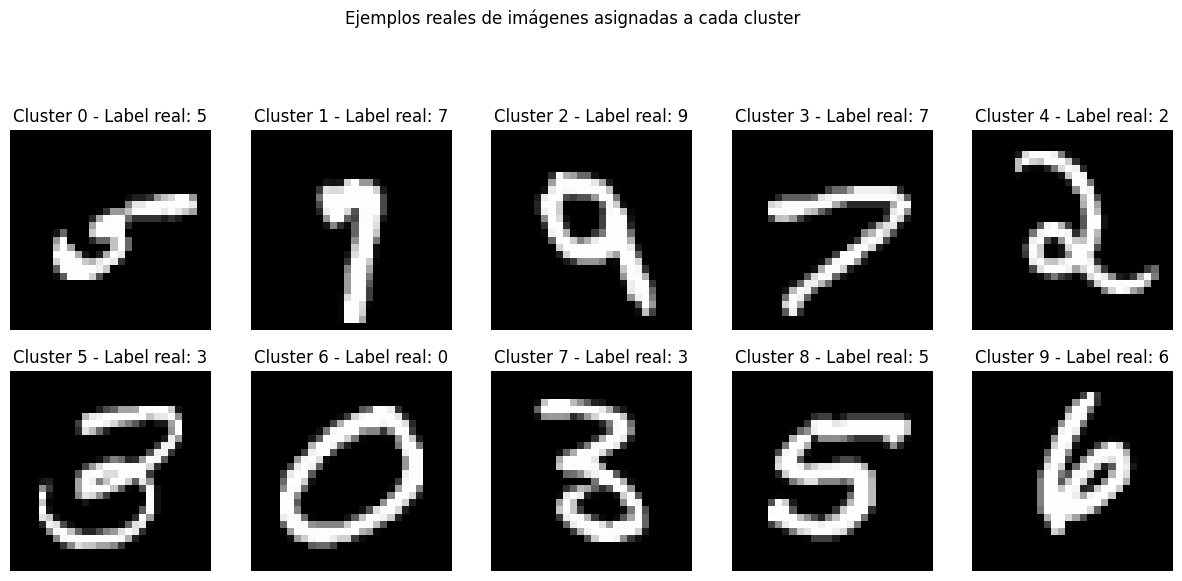

In [55]:
# Mostrar ejemplos de imágenes asignadas a cada cluster
plt.figure(figsize=(15,12))
for cluster_id in range(num_clusters):
    # Tomar una muestra aleatoria del cluster actual
    indices = np.where(train_cluster_labels == cluster_id)[0]
    sample_index = np.random.choice(indices)
    sample_img = X_train.iloc[sample_index].values
    sample_label = y_train.iloc[sample_index]

    plt.subplot(4, 5, cluster_id+1)
    plot_digit(sample_img, title=f"Cluster {cluster_id} - Label real: {sample_label}")
plt.suptitle("Ejemplos reales de imágenes asignadas a cada cluster")
plt.show()


Calcular valor optimo de clousters usando el metodo del codo y metodo silueta

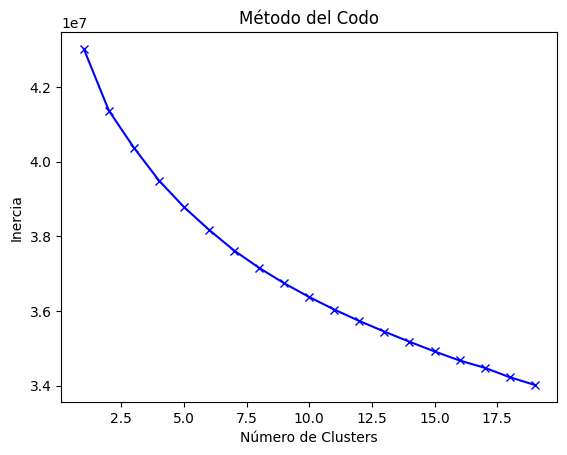

In [26]:
# Método del codo para encontrar el número óptimo de clusters
inertias = []
k_range = range(1, 20)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(scaled_train_data)
    inertias.append(kmeans.inertia_)

plt.figure()
plt.plot(k_range, inertias, 'bx-')
plt.xlabel('Número de Clusters')
plt.ylabel('Inercia (Suma de distancias cuadradas)')
plt.title('Método del Codo')
plt.show()

In [ ]:
# Método de la silueta para evaluar número óptimo de clusters
silhouette_scores = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(scaled_train_data)
    silhouette_avg = silhouette_score(scaled_train_data, cluster_labels)
    silhouette_scores.append(silhouette_avg)

plt.figure()
plt.plot(k_range, silhouette_scores, 'bx-')
plt.xlabel('Número de Clusters')
plt.ylabel('Puntuación de Silueta')
plt.title('Método de la Silueta')
plt.show()


In [ ]:
best_num_clusters = k_range[np.argmax(silhouette_scores)]
print(f"El número óptimo de clusters según la puntuación de silueta es: {best_num_clusters}")

# Elegir el mejor modelo basado en silhouette
kmeans_opt = KMeans(n_clusters=best_num_clusters, random_state=42, n_init=10)
kmeans_opt.fit(scaled_train_data)


In [ ]:
# Mostrar etiquetas y centroides del modelo óptimo
print("\nEtiquetas de cluster para las primeras 20 muestras con el modelo óptimo:")
print(kmeans_opt.labels_[:20])

plt.figure(figsize=(15,4))
for i in range(best_num_clusters):
    plt.subplot(1, best_num_clusters, i+1)
    plot_digit(kmeans_opt.cluster_centers_[i], title=f"Centroide {i}")
plt.suptitle("Centroides clusters óptimos")
plt.show()

In [ ]:
print('-' * 80)
print(f"Número de ejemplos en el conjunto de entrenamiento (80%): {scaled_train_data.shape[0]}")
print(f"Número de ejemplos en el conjunto de prueba (20%): {scaled_test_data.shape[0]}")

# Ya tienes el número óptimo de clusters calculado antes: best_num_clusters
# Entrenar KMeans con ese número óptimo de clusters
kmeans_opt = KMeans(n_clusters=best_num_clusters, n_init=10, random_state=42)
kmeans_opt.fit(scaled_train_data)

# Añadir la columna con las etiquetas de cluster al DataFrame original (train_data)
train_data['cluster_label'] = kmeans_opt.labels_

# Mostrar la distribución de ejemplos por cluster
print("\nCantidad de ejemplos por cluster en el conjunto de entrenamiento:")
print(train_data['cluster_label'].value_counts().sort_index())

# Calcular la distancia euclidiana desde cada punto hasta cada centroide (útil para análisis o para asignar certeza)
distancias_a_centroides = kmeans_opt.transform(scaled_train_data)

print(f"\nForma del array de distancias a centroides: {distancias_a_centroides.shape}")
print("Ejemplo de distancias de las primeras 5 muestras a cada centroide:")
print(distancias_a_centroides[:5])

# --- Evaluar con Silhouette Score usando el modelo óptimo ---
silhouette_avg = silhouette_score(scaled_train_data, kmeans_opt.labels_)
print(f"\nSilhouette Score para {best_num_clusters} clusters: {silhouette_avg:.4f}")
